# Heart Disease Dataset


Here is the given dataset, Apply complete ML Cycle on this 
( preprocessing , encoding & scaling , Model building and deployment )

## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Import the heart disease Dataset

heart_disease = pd.read_csv("heart/heart.csv")
heart_disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
#  Checking if data need cleaning
heart_disease.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
heart_disease.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

# Visualization

In [5]:
d1 = heart_disease.groupby('HeartDisease')["Age"].count()
d1

HeartDisease
0    410
1    508
Name: Age, dtype: int64

In [6]:
d1 = heart_disease.groupby('Age')["HeartDisease"].count().index >= 40
d2 =heart_disease.groupby('Age')["HeartDisease"].count().index < 40
d1

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

### Discription
The above scatter plot shows the graph between the Age factor and heart disease factor. As we can see from above graph that there is no data specifically identify that having more age lead to heart disease

In [7]:
d1 = heart_disease.groupby('HeartDisease')["Sex"].value_counts()

d1.values

array([267, 143, 458,  50], dtype=int64)

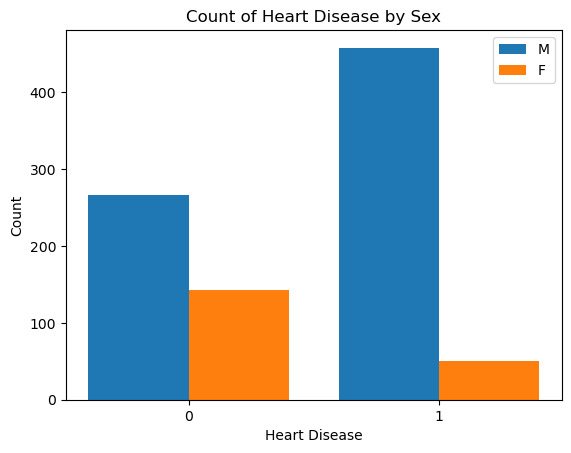

In [8]:
import matplotlib.pyplot as plt

# Assuming the data is stored in the 'd1' Series

# Extract the indices and values from the Series
indices = d1.index
values = d1.values

# Separate the values for males and females
males_values = values[::2]
females_values = values[1::2]

# Set the x-axis labels
x_labels = ['0', '1']

# Create the bar plot
x = range(len(x_labels))
width = 0.4

plt.bar(x, males_values, width, label='M')
plt.bar([i + width for i in x], females_values, width, label='F')

# Set x-axis tick labels
plt.xticks([i + width/2 for i in x], x_labels)

# Set labels and title
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Count of Heart Disease by Sex')

# Show the legend
plt.legend()

# Display the plot
plt.show()

C:\Users\Barcha\AppData\Local\Temp\ipykernel_6748\1989362577.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = heart_disease.corr()


<Axes: >

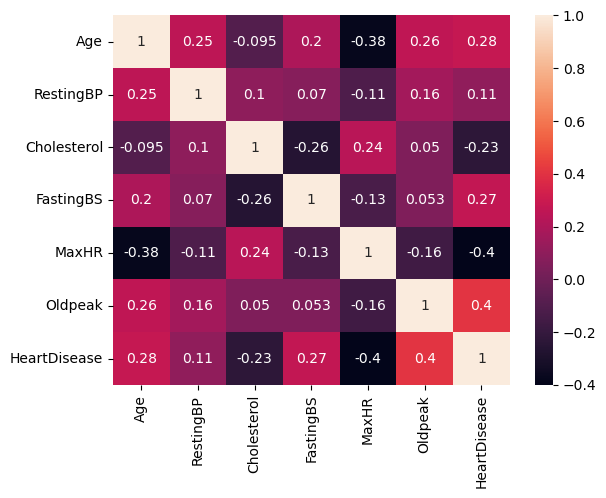

In [9]:
data = heart_disease.corr()
sns.heatmap(data , annot=True)

As you can see from above heatmap correlation the best correlation is of heart_disease and Age in numerical Data

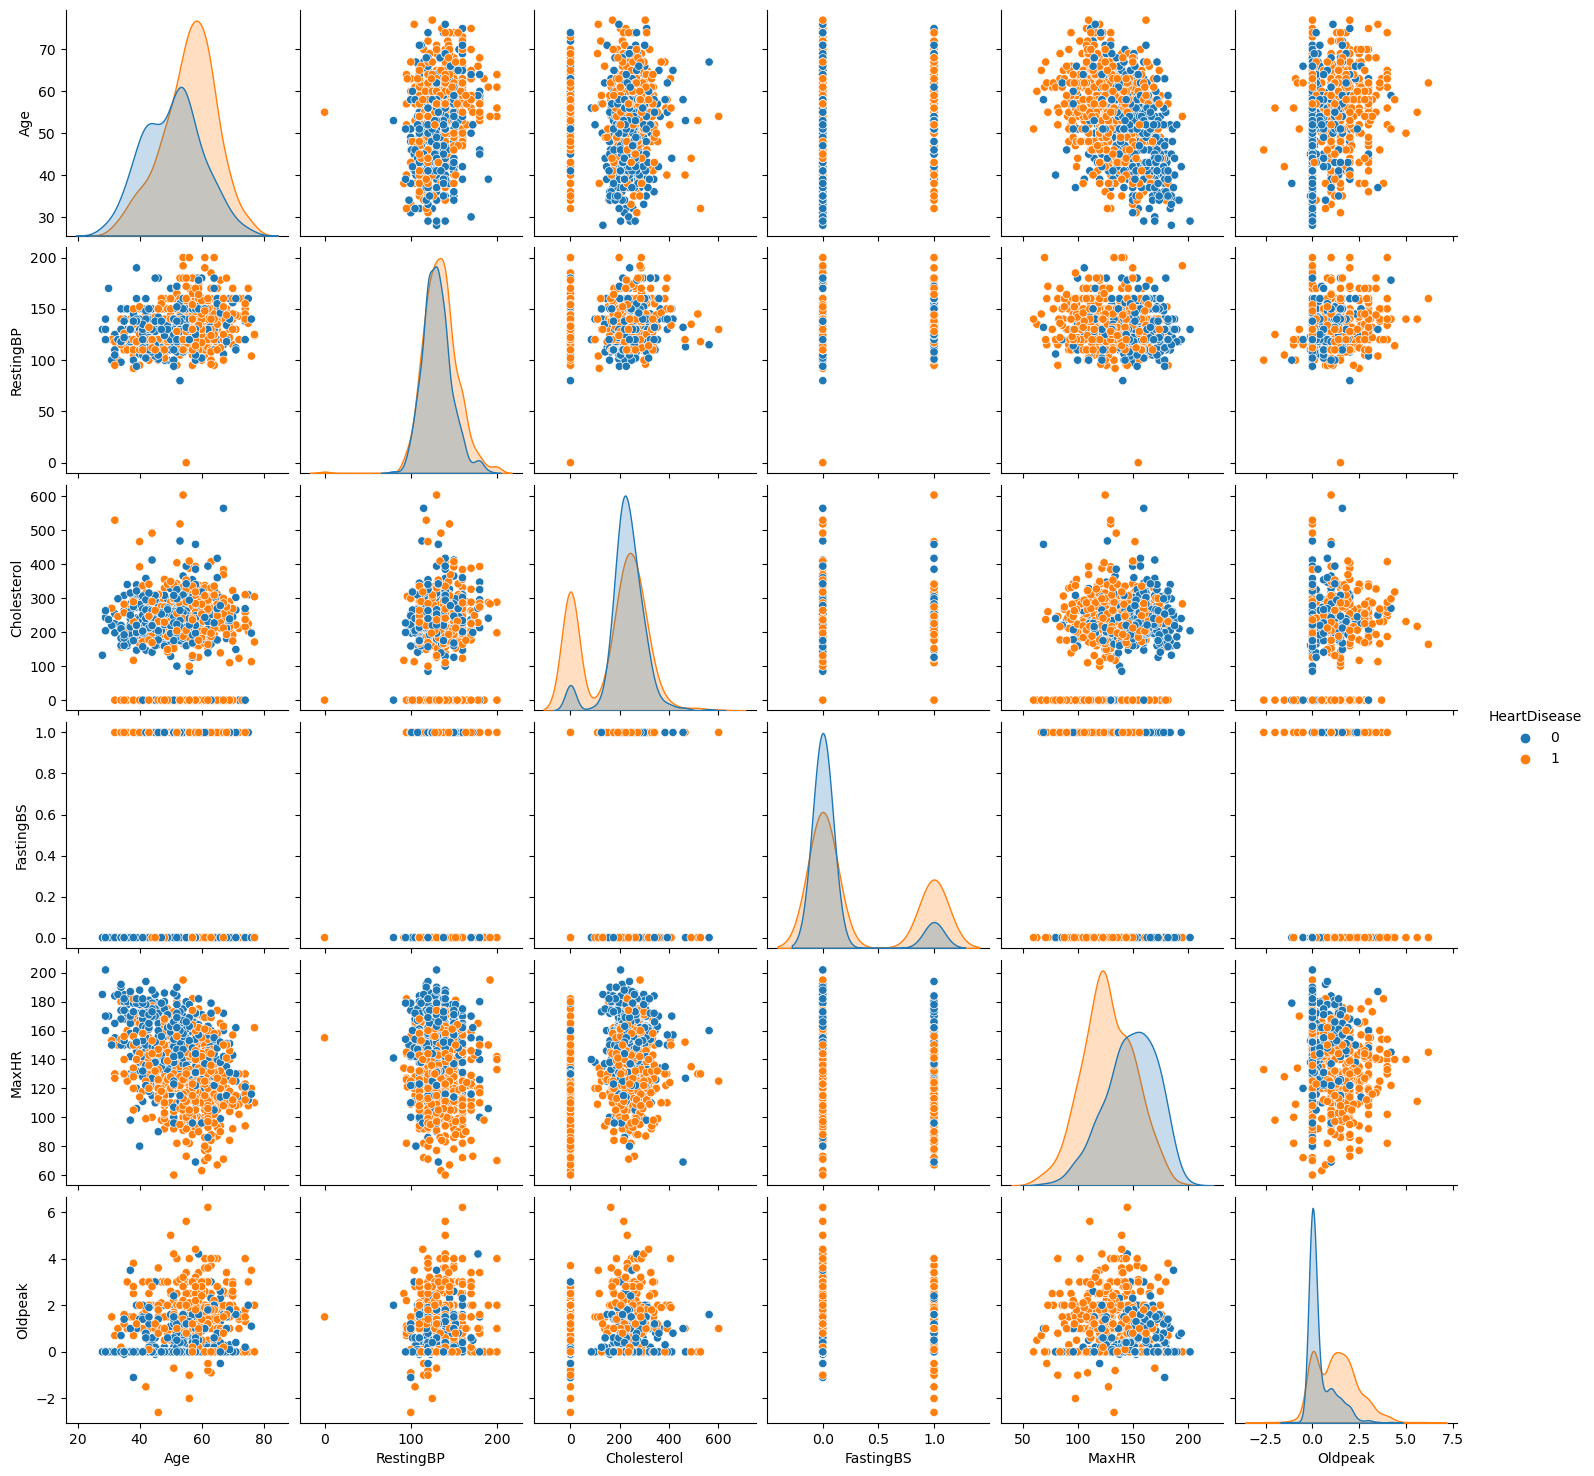

In [10]:
sns.pairplot(heart_disease , hue="HeartDisease")

## Model Train


In [30]:
heart_disease = pd.read_csv("DataSets/heart.csv")
heart_disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [31]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score ,mean_squared_error,mean_absolute_error
 

In [34]:
heart_disease = pd.read_csv("DataSets/heart.csv")


In [35]:
x = heart_disease.drop('HeartDisease',axis= 1)
y= heart_disease["HeartDisease"]

categorical = ["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"] 
one_hot = OneHotEncoder()
coder = ColumnTransformer([("one_hot",one_hot,categorical)])

trans_x = coder.fit_transform(x)
trans_x

x = pd.DataFrame(trans_x)


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score ,f1_score
from sklearn.ensemble import RandomForestClassifier 
import joblib

In [37]:
np.random.seed(42)

x_train ,x_test ,y_train ,y_test = train_test_split(x,y,test_size = 0.3)

In [38]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
model.score(x_test,y_test)

0.8514492753623188

In [40]:
y_pred = model.predict(x_test)

In [41]:
accuracy_score(y_pred ,y_test)

0.8514492753623188

In [42]:
joblib.dump(model ,"4thJuneModel.pkl")

['4thJuneModel.pkl']

## Joblib Model

In [43]:
mod = joblib.load("4thJuneModel.pkl")

In [44]:
y_pred = mod.predict(x_test)
y_pred 
y_test
pd.DataFrame({"y_test":np.array(y_test),"y_pred":y_pred}).head(20)

,y_test,y_pred
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
5,1,1
6,1,1
7,0,0
8,1,1
9,1,1


In [45]:
accuracy_score(y_test ,y_pred)

0.8514492753623188

In [46]:
precision_score(y_test ,y_pred)

0.912751677852349

In [49]:
f1_score(y_test ,y_pred)

0.8690095846645368

In [50]:
recall_score(y_test ,y_pred)

0.8292682926829268